# Results for 5 patients on 10D problem

Utility function: linear utility terms for chest wall and ribs, linear-quadratic utility terms for all other ROIs

Parameters: all dose parameters are tuned (except for PTV D95), with search space [1/4max,max].

The tables all percent difference values (i.e., percent difference from AcceptanceLevel and percent difference from approved plan).

In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
my_cmap = ListedColormap(sns.diverging_palette(220, 20, n=256).as_hex())

sys.path.append('../src')
import analyze
import raybay

In [2]:
def goalplot(approved, res_dict):
    val_list = []
    roi_dict = {}
    for index, row in approved.goal_df.iterrows():
        goal_vals = []
        level = approved.goal_dict[index][0]
        roi_dict[f"{index} {row['Roi']} {row['Type']}"] = index
        for res in res_dict:
            if res.lower() in ('default'):
                idx_sol = 0
            else:
                idx_sol = np.argmin(res_dict[res].opt_result.func_vals)
            val = res_dict[res].goal_dict[index][idx_sol]
            goal_vals.append(100*(val - level)/level)
        val_list.append(goal_vals)
    columns = res_dict.keys()
    val_df = pd.DataFrame(columns=columns, data=val_list, index=roi_dict)
    ncols = len(res_dict)
    fig, ax = plt.subplots(1, figsize=(ncols, len(approved.goal_df)))
    sns.heatmap(val_df, cmap=sns.diverging_palette(220, 20, n=256), center=0,
                annot=True, fmt=".2f", cbar_kws={'label': 'Percent Difference From Approved'}, ax=ax)

In [48]:
def patientplot(folder, normalize=False):
    approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
    default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
    dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
    bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
    analyze.goalplot(approved.goal_df, {'Approved': approved, 'Default': default, 'Dummy': dummy, 'Bayes': bayes})
    goalplot(approved, {'Default': default, 'Dummy': dummy, 'Bayes': bayes})
    if normalize:
        idx = np.argmin(bayes.opt_result.func_vals)
        coeff = bayes.goal_dict[6][idx]/bayes.dvh_dict['Dose'][-1]
    else:
        coeff = 1.0
    for roi in approved.roi_list:
        plt.figure()
        plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
        plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
        plt.plot(dummy.dvh_dict['Dose'], dummy.dvh_dict[roi])
        plt.plot(coeff*bayes.dvh_dict['Dose'], bayes.dvh_dict[roi])
        plt.xlabel('Dose (cGy)')
        plt.ylabel('Volume (%)')
        plt.title(roi)
        plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'])

# Patient 1

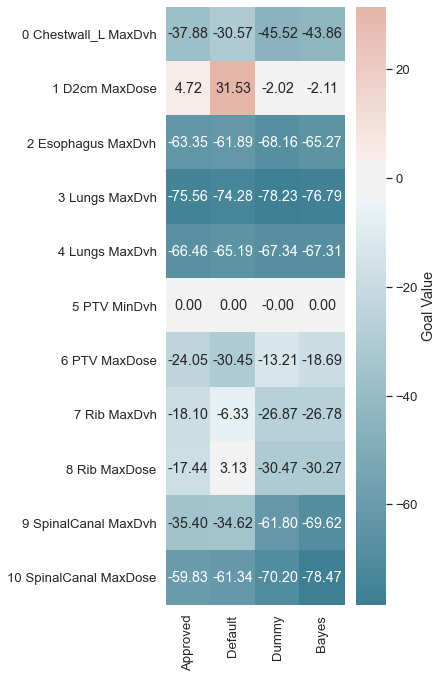

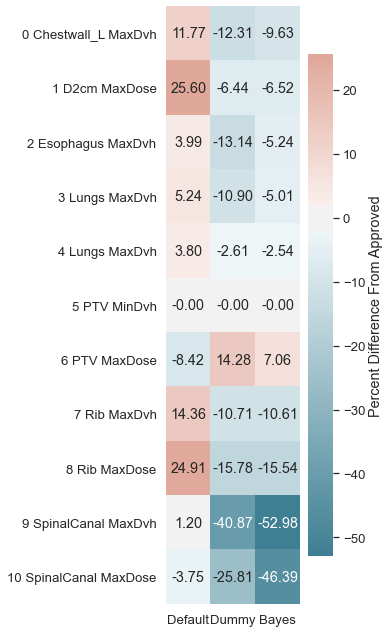

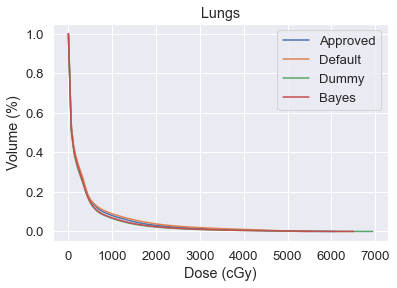

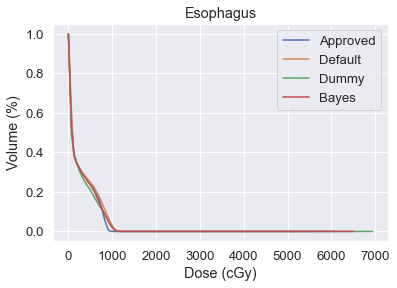

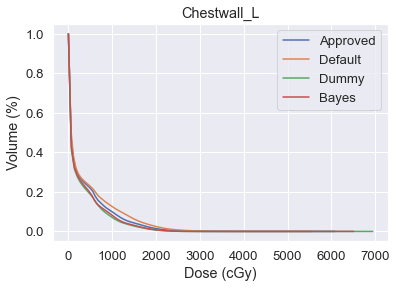

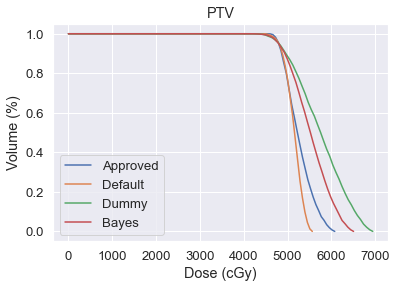

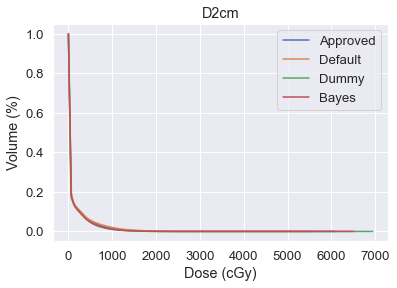

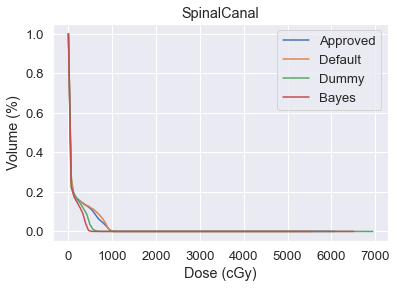

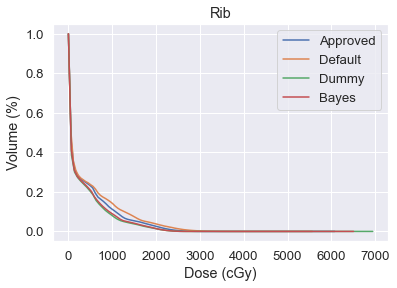

In [12]:
patientplot('SBRT_lung_minsun')

(-500.0, -300.0)

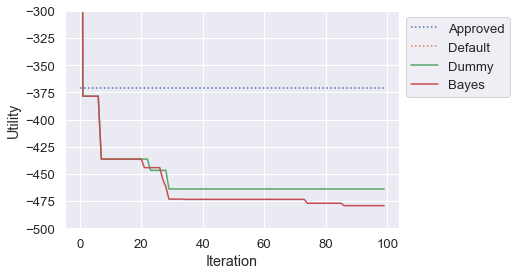

In [42]:
folder = 'SBRT_lung_minsun'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-500, -300])

# Patient 2

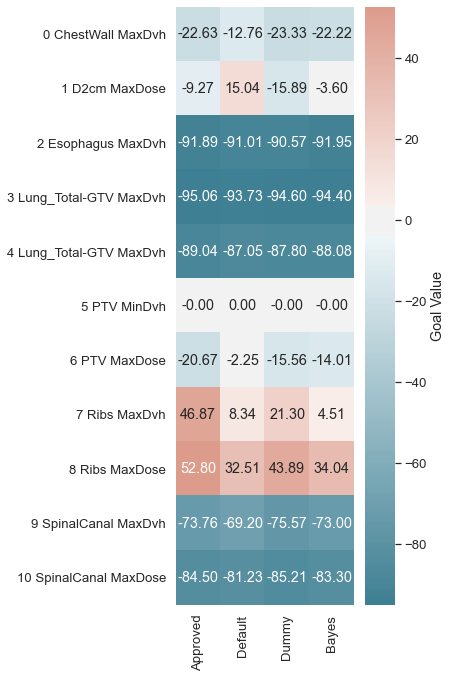

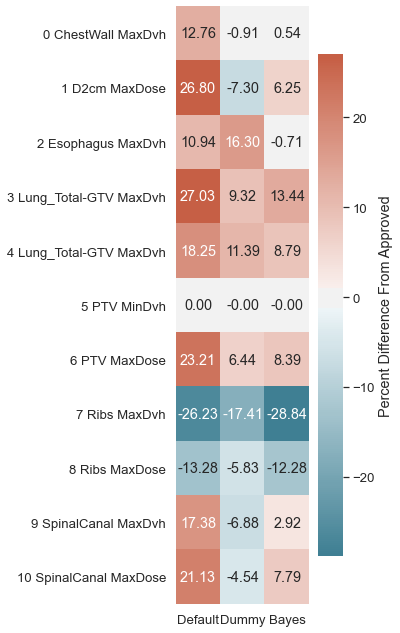

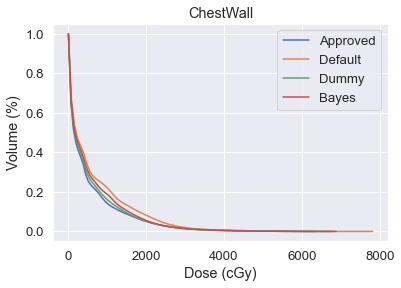

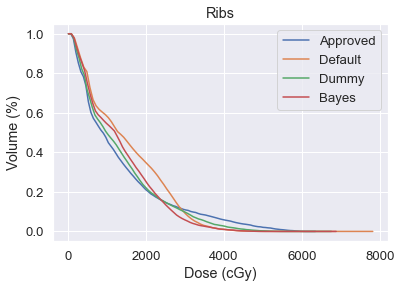

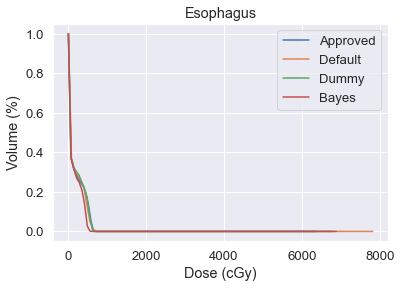

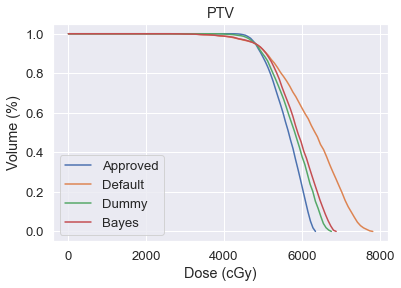

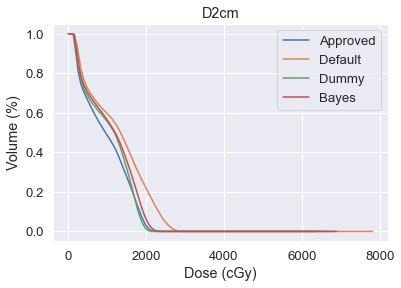

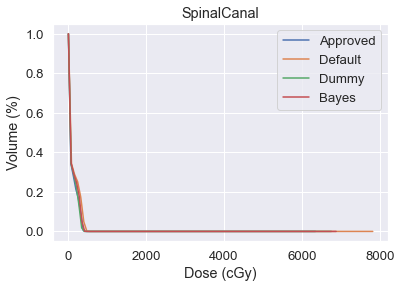

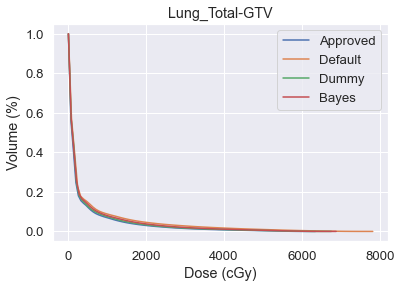

In [13]:
patientplot('ZZ_MK_LLungSBRT3778')

(-500.0, 0.0)

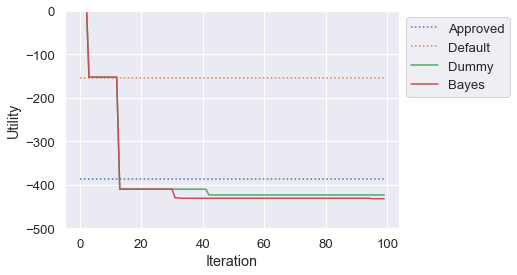

In [36]:
folder = 'ZZ_MK_LLungSBRT3778'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-500, 0])

# Patient 3

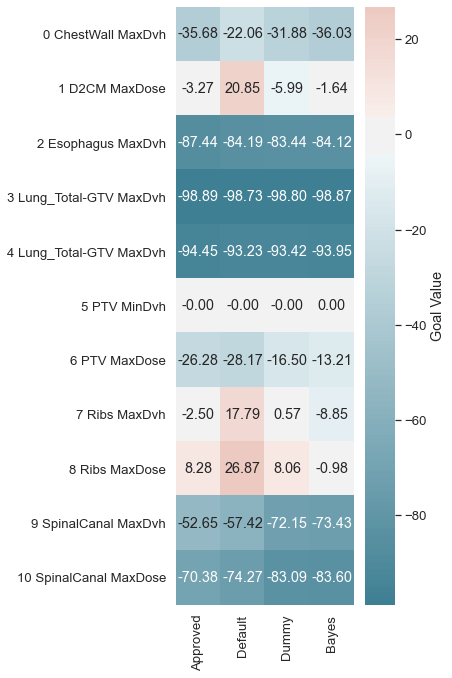

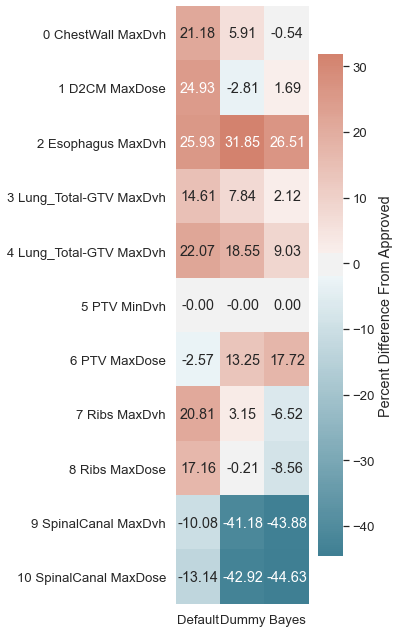

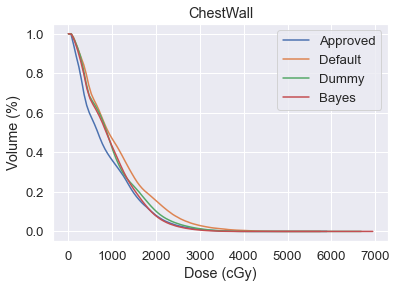

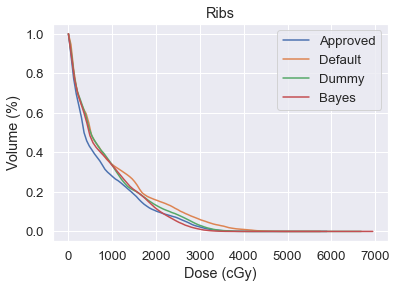

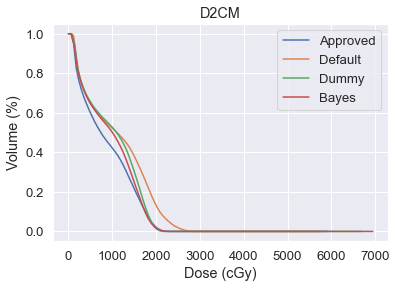

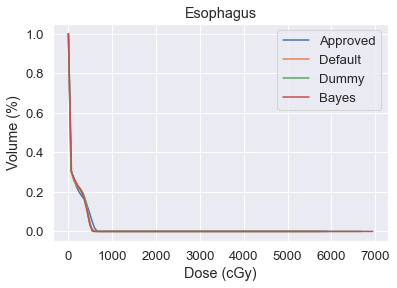

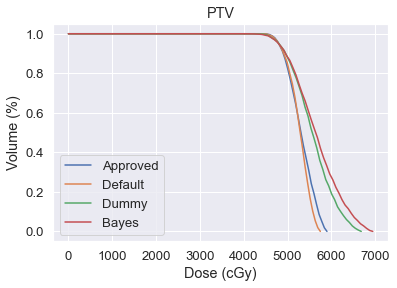

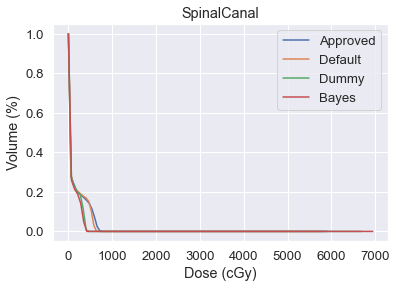

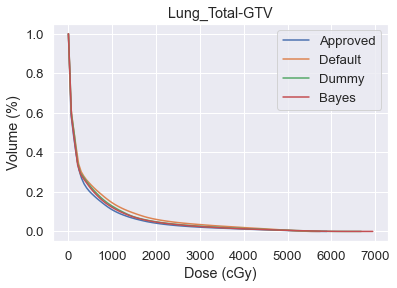

In [56]:
patientplot('ZZ_MK_RLungSBRT4076')

(-500.0, -400.0)

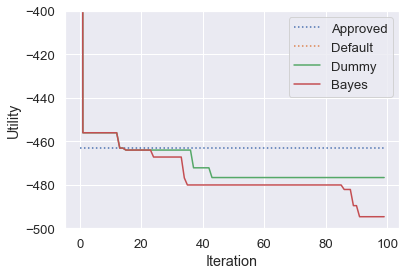

In [45]:
folder = 'ZZ_MK_RLungSBRT4076'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-500, -400])

# Patient 4

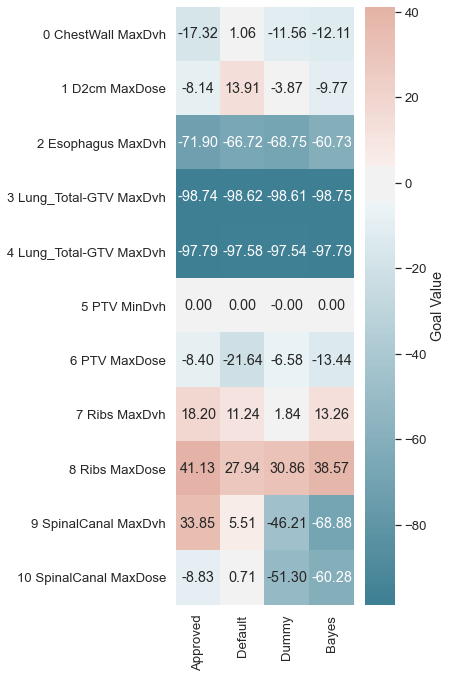

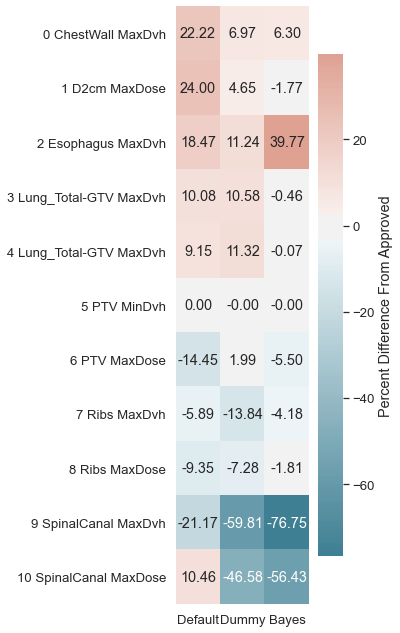

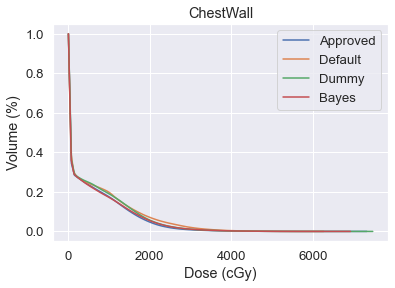

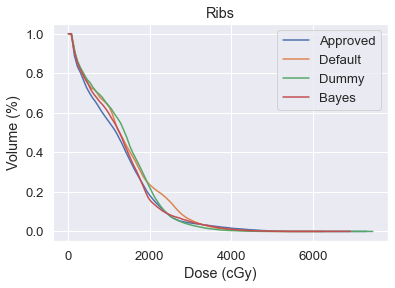

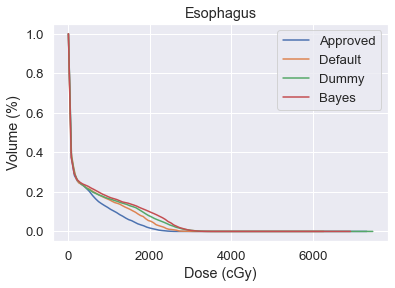

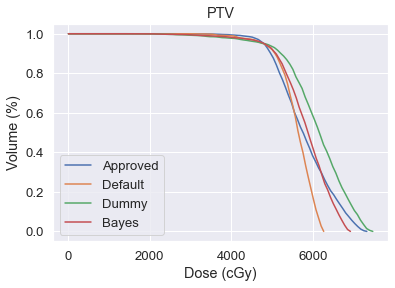

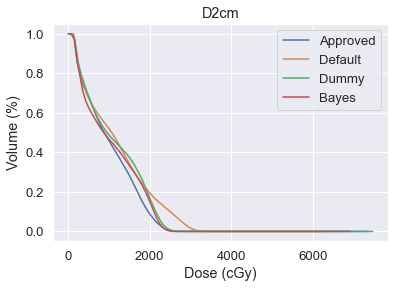

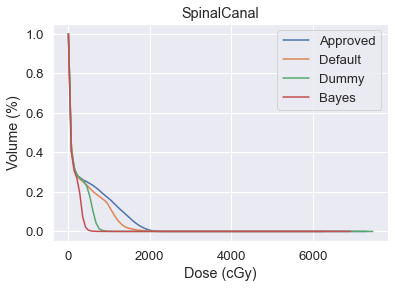

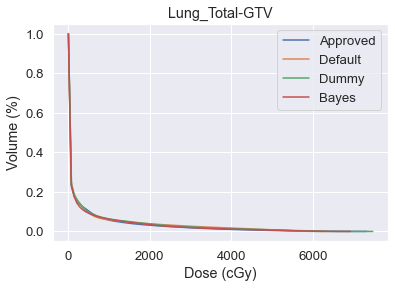

In [49]:
patientplot('ZZ_MK_RULungSBRT3796', True)

(-400.0, 0.0)

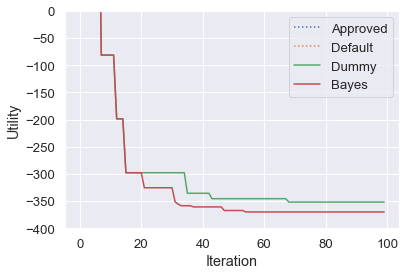

In [55]:
folder = 'ZZ_MK_RULungSBRT3796'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-400, 0])

# Patient 5

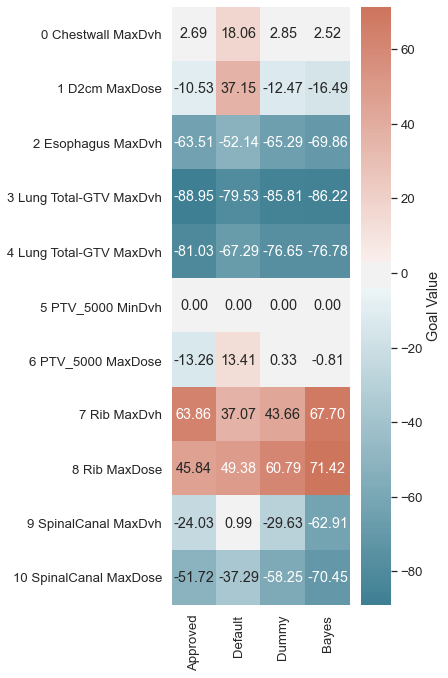

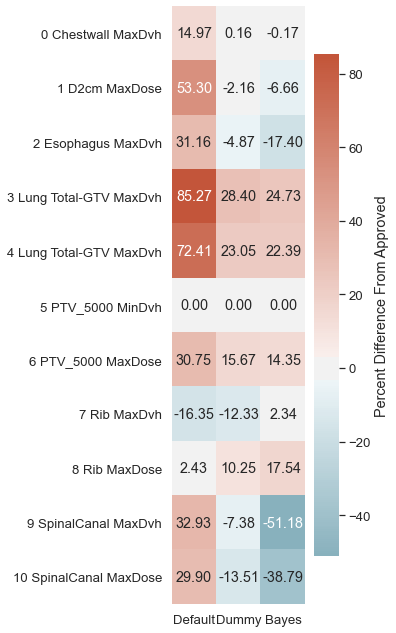

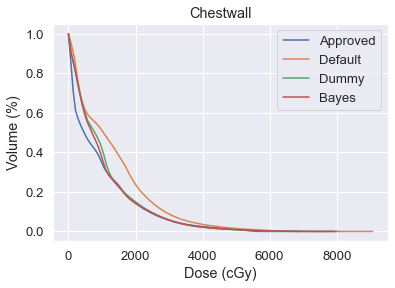

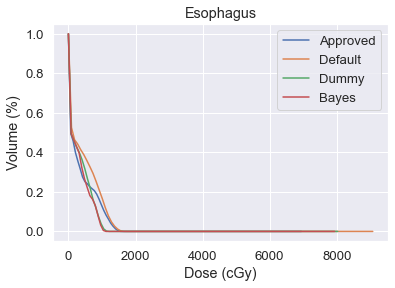

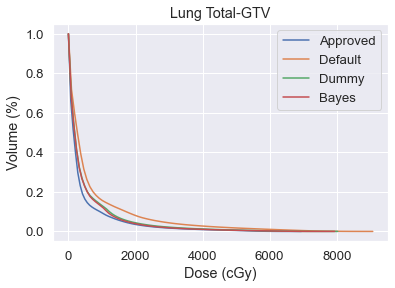

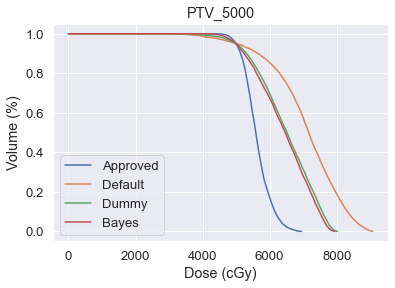

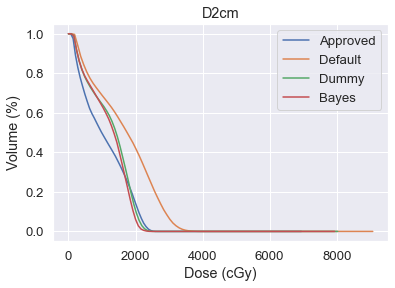

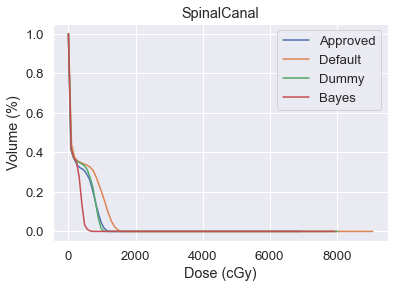

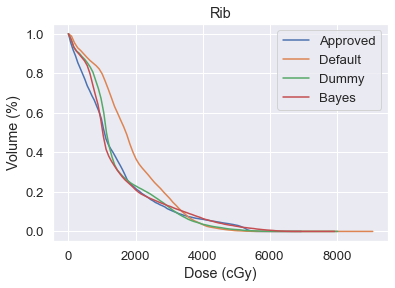

In [57]:
patientplot('ZZ_MK_LLLungSBRT3977')

(-300.0, 0.0)

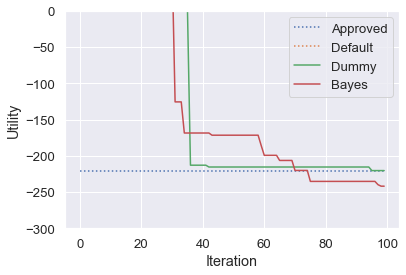

In [66]:
folder = 'ZZ_MK_LLLungSBRT3977'
approved = np.load(folder + '/approved/res_approved.pkl', allow_pickle=True)
default = np.load(folder + '/default/res_default.pkl', allow_pickle=True)
dummy = np.load(folder + '/bayes/res_linquad_dummy_minimize.pkl', allow_pickle=True)
bayes = np.load(folder + '/bayes/res_linquad_gp_minimize.pkl', allow_pickle=True)
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, approved.goal_dict)[0], -raybay.get_utility(bayes.goal_df, approved.goal_dict)[0]], ':')
plt.plot([0, 99], [-raybay.get_utility(bayes.goal_df, default.goal_dict)[0], -raybay.get_utility(bayes.goal_df, default.goal_dict)[0]], ':')
plt.plot(np.minimum.accumulate(dummy.opt_result.func_vals))
plt.plot(np.minimum.accumulate(bayes.opt_result.func_vals))
plt.xlabel('Iteration')
plt.ylabel('Utility')
plt.legend(['Approved', 'Default', 'Dummy', 'Bayes'], bbox_to_anchor=(1, 1))
plt.ylim([-300, 0])